In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Kmean_dataset.csv')
df=df.values

In [3]:
# Normalize the features:
def min_max_normalization(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X)
    normalized_X = ((X - min_val) / (max_val - min_val))
    return normalized_X

X = min_max_normalization(df)

In [4]:
def kmeans(X, K):
    m = X.shape[0] 
    # Initialize centroids
    centroids = X[np.random.choice(m, K, replace=False)]
    labels = np.zeros(m).astype(int)
    while True:
        prev_labels = labels.copy()
    
        distances = np.zeros((m, K))
        for j in range (K):
            distances[:,j] = np.sqrt(((X - centroids[j])**2).sum(axis=1))
        labels = np.argmin(distances, axis=1) 
        
        for i in range (K):
            centroids[i, :] = X[labels == i].mean(axis=0)

        if np.all(labels == prev_labels):
            break

    return labels, centroids

In [5]:
K=5
labels, centroids = kmeans(X, K=5)

In [6]:
print ("Labels = ",labels)
print ("Centroids = ",centroids)

Labels =  [2 2 1 1 4 1 1 1 2 2 1 1 1 2 1 1 1 2 1 4 4 4 2 2 4 4 1 1 2 2 1 1 2 1 2 2 2
 2 2 4 4 2 2 4 2 2 2 2 2 1 2 1 1 1 2 2 2 1 1 3 4 0 3 0 0 4 3 3 4 4 4 0 0 2
 2 0 0 3 4 0 0 4 3 3 3 0 3 3 4 3 0 0 3 0 0 2 3 0 4 0 4 3 0 0 4 0 3 3 0 4 3
 0 3 0 0 0 3 0 0 3 3 0 0 0 0 0 0 0 0 3 3 3 3 3 4 4 4 3 3 3 3 4 3 3 4 4 0 3
 4 3 3 0 0 4 3 4 0 2 4 3 3 4 3 4 3 3 4 4 4 3 3 0 4 4 4 4 4 3]
Centroids =  [[8.29161791e-04 8.98136756e-04 5.57685892e-04 6.11919529e-03
  1.35531136e-02 7.65556465e-04 1.04126690e-03 1.45615663e-04
  6.78279086e-04 1.46097269e-03 3.05184876e-04 8.33047327e-04
  8.81707451e-02]
 [1.69565660e-03 6.27605638e-04 6.83265335e-04 3.87798793e-03
  2.23602484e-02 1.16916027e-03 1.64966098e-03 1.00421849e-04
  9.02653003e-04 2.96654594e-03 3.69153091e-04 1.05177853e-03
  7.56465918e-01]
 [1.52035049e-03 7.12295316e-04 6.05328738e-04 4.21631106e-03
  2.27409337e-02 1.07051694e-03 1.46342981e-03 9.29411396e-05
  8.80783309e-04 2.24652731e-03 3.37654076e-04 1.10798044e-03
  5.30808522e-01]
 [9

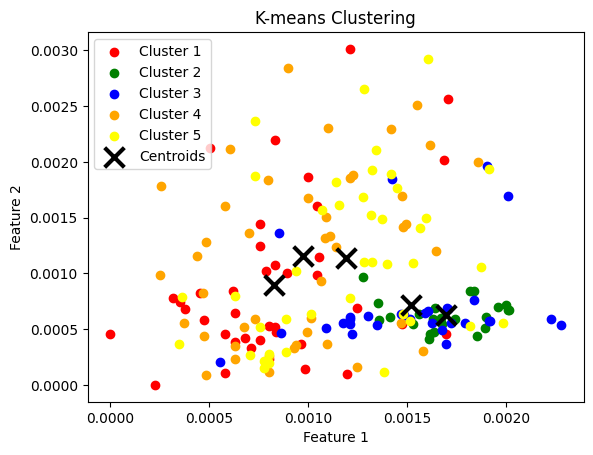

In [10]:
# Plot the clustered data
colors = ['r', 'g', 'b', 'orange', 'yellow']
for i in range(K):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()